In [1]:
import pandas as pd
import os

print(os.getcwd())

C:\Users\admin\Documents\test\Untitled Folder


In [3]:
sample_1 = pd.read_excel(r"C:\Users\admin\Documents\test\Untitled Folder\data\sample_1.xlsx",
                       header =1,
                       skipfooter = 2,
                       engine = 'openpyxl',
                       usecols = 'A:C')
sample_1.head()

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912


In [4]:
sample_1.tail()

,국적코드,성별,입국객수
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [5]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [6]:
#기초 통계 보기 
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [8]:
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [9]:
#하나의 컬럼 값만 가져오기 
sample_1["입국객수"]

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [10]:
#여러 컬럼값들 가져오기
sample_1[["입국객수","성별"]]

,입국객수,성별
0,106320,남성
1,191436,여성
2,319,남성
3,42,여성
4,158912,남성
5,232943,여성


In [12]:
#컬럼 생성
sample_1["기준년월"] = '2019-11' #해당값으로 값이 들어감
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [13]:
#데이터 선택하기 로우 
sample_1.loc[1]

국적코드        A01
성별           여성
입국객수     191436
기준년월    2019-11
Name: 1, dtype: object

In [14]:
sample_1.loc[sample_1["성별"] == "남성"]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [16]:
condition = (sample_1["성별"] == "남성")

sample_1[condition]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [19]:
sample_1.loc[sample_1["입국객수"] >= 150000]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [20]:
sample_1.loc[(sample_1["성별"] == "남성") &
             (sample_1["입국객수"]>=15000)]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
4,A18,남성,158912,2019-11


In [28]:
#한 컬럼에 여러조건 필터링1
sample_1.loc[(sample_1["국적코드"] == 'A01')| (sample_1["국적코드"] == 'A18')]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [33]:
#한 컬럼에 여러조건 필터링2
sample_1[sample_1["국적코드"].isin(["A01"])]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11


In [34]:
#데이터 통합하기  - pc. merge() : 병합 옆
code_master = pd.read_excel("./data/sample_codemaster.xlsx")
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [35]:

sample_1_code = pd.merge(left = sample_1, 
                         right = code_master, 
                         how = 'left', 
                         left_on='국적코드', 
                         right_on = '국적코드')
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [58]:
#데이터 통합하기 위아래 - 아래에 붙일 데이터 만들기 

sample_2 = pd.read_excel("./data/sample_2.xlsx",
                        header = 1,
                        skipfooter = 2,
                        usecols = 'A:C')

sample_2["기준년월"] = '2019-11'
sample_2_code = pd.merge(left = sample_2, 
                         right = code_master, 
                         how='left', 
                         left_on="국적코드", 
                         right_on = "국적코드")
sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-11,일본
1,A01,여성,163737,2019-11,일본
2,A18,남성,155540,2019-11,중국
3,A18,여성,249023,2019-11,중국


In [62]:
#만든 데이터들 위아래로 붙이기 
sample = sample_1_code.append(sample_2_code, ignore_index = True )
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-11,일본
7,A01,여성,163737,2019-11,일본
8,A18,남성,155540,2019-11,중국
9,A18,여성,249023,2019-11,중국


In [63]:
#데이터 저장
sample.to_excel('./data/sample_me.xlsx')

# 크롤링

In [117]:
from selenium import webdriver 
import os

크롬 드라이버를 다운받는다. 

In [118]:
driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")
print(os.getcwd())

<ipython-input-118-5ca8bc392bb7>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")


C:\Users\admin\Documents\test\Untitled Folder


In [119]:
url = 'https://www.naver.com'
driver.get(url)

In [120]:
html = driver.page_source

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/ed
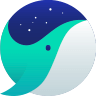
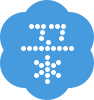

In [121]:
html

In [122]:
#뷰티풀솝을 이용한 정보찾기 -> 문자열 파싱
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [123]:
tags_span = soup.select('span')
print(tags_span)

[<span>뉴스스탠드 바로가기</span>, <span>주제별캐스트 바로가기</span>, <span>타임스퀘어 바로가기</span>, <span>쇼핑캐스트 바로가기</span>, <span>로그인 바로가기</span>, <span class="blind">NAVER whale</span>, <span class="_1syGnXOL _3di88A4c" data-clk="dropbanner1b" style="
padding-right: 20px;
font-size: 18px;
color: #010101;
padding-left: 39px;
"><span>눈 건강 지킴이 </span><strong style="color: #008aff">웨일 다크 모드! </strong><span>지금 바로 사용해보세요</span></span>, <span>눈 건강 지킴이 </span>, <span>지금 바로 사용해보세요</span>, <span style="background-color: #1f97fd">다운로드</span>, <span class="blind">네이버</span>, <span class="blind">쥬니어네이버</span>, <span class="blind">해피빈</span>, <span class="blind">검색</span>, <span class="ico_search_submit"></span>, <span class="blind">한글 입력기</span>, <span class="ico_keyboard"></span>, <span class="blind">자동완성 레이어</span>, <span class="ico_arr"></span>, <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>, <span class="common_ico_kwd"><i class="imsc ico_search"></i><

In [124]:
tags_p = soup.select('p')
tags_p 

[<p class="dsc">
 <i class="imsc ico_election"></i><span class="_alert_passage"></span>
 </p>,
 <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>,
 <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="toast_msg">구독한 언론사에 추가되었습니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="toast_msg">구독한 언론사에 추가되었습니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 일시 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="dsc_msg">언론사 구독 설정에서 관심있는 언론사를 구독하시면<br/>언론사가 직접 편집한 뉴스들을 네이

In [125]:
#span에 있는 class 이름이 name인 것 . name으로 찾으면 나오는게 없어서 나는 blind를 찾아봄
tags_name = soup.select('span.blind')
tags_name

[<span class="blind">NAVER whale</span>,
 <span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="blind">한글 입력기</span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="blind">쇼핑</span>,
 <span class="blind">쇼핑LIVE</span>,
 <span class="blind">리스트형</span>,
 <span class="blind">썸네일형</span>,
 <span class="blind">설정</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span 

In [126]:
test = soup.select('div.list_theme_wrap > ul.list_theme > li.theme_item > a')

In [127]:
test

[<a class="theme_thumb" data-clk="tcc_hea.list1cont1" href="https://post.naver.com/viewer/postView.naver?volumeNo=32741612&amp;memberNo=11195360" target="_blank">
 <img alt="잘 때 만세 자세로 잔다면 ‘이 질환’ 조심!" height="114" loading="lazy" src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211125_1095%2Fupload_1637847316225fMwIF.jpg%22&amp;type=nf340_228" width="170"/>
 <span class="thumb_bd"></span>
 </a>,
 <a class="theme_info" data-clk="tcc_hea.list1cont1" href="https://post.naver.com/viewer/postView.naver?volumeNo=32741612&amp;memberNo=11195360" target="_blank">
 <em class="theme_category"> 건강</em>
 <strong class="title elss">잘 때 만세 자세로 잔다면 ‘이 질환’ 조심!</strong>
 <p class="desc">간혹 만세 자세를 해야지만 잠이 잘 온다는 분들이 있습니다. 만세 자세가 습관이 되어 잠이 들 때쯤 자신도 모르는 사이에 두 팔이 머리 위로 올라가기도 하는데요. 만세하고 자는 모습은 아기들에게서 흔히 볼 수 있습니다. 폐가 완전히 발달하지 않은 영유아의 경우, 만세 자세를 하면 횡격막이 올라가 숨 쉬기가 수월해지기 때문이죠. 하지만 성인이 되어서도 만세 </p>
 <div class="source_box">
 <span class="date">1주일 전</spa

# 멜론 노래순위 정보 가져오기

In [139]:
from selenium  import webdriver
from bs4 import BeautifulSoup

In [129]:
driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")
url = "https://www.melon.com/chart/index.htm"
driver.get(url)


<ipython-input-129-a0e33d7b5dd5>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")


In [197]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [198]:
songs = soup.select('div.wrap_song_info')

In [199]:
#노래 제목
songs = soup.select('div.ellipsis.rank01 > span > a')

#가수 
singer = soup.select('div.ellipsis.rank02 > span > a ')

In [200]:
songs

[<a href="javascript:melon.play.playSong('1000002721',34298499);" title="리무진 (Feat. MINO) (Prod. GRAY) 재생">리무진 (Feat. MINO) (Prod. GRAY)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34256568);" title="회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom) 재생">회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34298496);" title="만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL) 재생">만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34215822);" title="쉬어 (Feat. MINO) (Prod. GRAY) 재생">쉬어 (Feat. MINO) (Prod. GRAY)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34215821);" title="Wake Up (Prod. 코드 쿤스트) 재생">Wake Up (Prod. 코드 쿤스트)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34061322);" title="사랑은 늘 도망가 재생">사랑은 늘 도망가</a>,
 <a href="javascript:melon.play.playSong('1000002721',34101563);" title="strawberry moon 재생">strawberry moon</a>,
 <a href="javascript:melon.play.playSo

In [192]:
print(len(songs))

100


In [194]:
songs[0].get_text()

'리무진 (Feat. MINO) (Prod. GRAY)'

In [201]:

count = 0
for i in songs : 
    title = songs[count].get_text()
    name = singer[count].get_text()
    count +=1
    print(title,"|",name)

리무진 (Feat. MINO) (Prod. GRAY) | BE'O (비오)
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom) | sokodomo
만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL) | 베이식 (Basick)
쉬어 (Feat. MINO) (Prod. GRAY) | 아넌딜라이트(Anandelight)
Wake Up (Prod. 코드 쿤스트) | unofficialboyy
사랑은 늘 도망가 | BE'O (비오)
strawberry moon | 지구인
Savage | Mudd the student
다정히 내 이름을 부르면 | 개코
STAY | Ourealgoat (아우릴고트)
신호등 | SINCE
깐부 (Feat. 염따, ASH ISLAND) (Prod. TOIL) | 안병웅
Next Level | Tabber
너를 생각해 | 조광일
이제 나만 믿어요 | 임영웅
My Universe | 아이유
OHAYO MY NIGHT | aespa
Permission to Dance | 경서예지
Butter | 전건호
너와 나의 Memories | The Kid LAROI
Reset (Feat. 개코, Kid Milli) (Prod. 코드 쿤스트) | Justin Bieber
낙하 (with 아이유) | 이무진
그대라는 사치 | 쿤타
바라만 본다 | aespa
문득 | 주시크 (Joosiq)
TROUBLE (Prod. Slom) | 임영웅
별빛 같은 나의 사랑아 | Coldplay
다시 사랑한다면 (김필 Ver.) | 방탄소년단
Dynamite | 디핵 (D-Hack)
잊었니 | PATEKO (파테코)
HERO | 방탄소년단
Peaches (Feat. Daniel Caesar & Giveon) | 방탄소년단
Weekend | 염따
끝사랑 | TOIL
Bad Habits | 쿤타
헤픈 우연 | 베이식 (Basick)
Bk Love | 365LIT
고백 | 황지상
라일락 | 송민영
Celebrity | SINCE
밤하

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

with urlopen('https://www.joongang.co.kr/') as response:
    soup = BeautifulSoup(response, 'html.parser')
    for anchor in soup.select("h2.headline"):
        print(anchor.get_text())


"임신후 버려졌다" 폭로에…고세원 "3개월 교제한 여성, 죄송"


"할리우드인 줄"…결별 10년된 김혜수·유해진 뭉친 이유


개식용·차별금지법은 밑밥? "文이 던질 진짜 카드 따로 있다"


이재용, 인천공항 대신 택했다…출입국 10분만에 끝내는 이곳 [강갑생의 바퀴와 날개]


"10분만에 피 맑아진 환자…해외 의사도 증언한 땅의 치유력" [맨발로걸어라]


사설·칼럼


혁신창업의 길


법조 오피니언 허브, 로담(Law談)


헷갈리는 방역 A to Z


TODAY'S HOT

개식용·차별금지법은 밑밥?"文의 진짜 카드 따로 있다"
개식용·차별금지법은 밑밥?"文의 진짜 카드 따로 있다"




대선 흔드나…심상정·안철수·김동연 '3지대 빅텐트론' 뜬다
대선 흔드나…심상정·안철수·김동연 '3지대 빅텐트론' 뜬다




이재용, 인천공항 대신 택했다…출입국 10분만에 끝내는 이곳
이재용, 인천공항 대신 택했다…출입국 10분만에 끝내는 이곳



넷플릭스 영화로 돌아온 80년대 '책받침 미녀' 누구?
회원전용


새 변이 오미크론, BTS로 시끄러운 정치권, 종부세 폭탄


석달새 32% 빠졌다, 돈 잘버는 '페이팔' 무슨일
회원전용


[디지털스페셜] 네카라쿠배 성장의 비밀
회원전용



생굴 시킨 손님, 그냥 떠난다…요즘 뉴욕 식당 굴 모으는 이유




"돈다발 들여와 직원 월급 줬다"…'극한직업' 평양 주재 외교관




"비명 유리창 깨려니 경찰이 막더라" 인천 흉기 난동 현장 증언




진통오자 직접 자전거 타고 병원으로...1시간만 출산한 女의원




도미노 쓰러지듯 번지는 오미크론… 전세계 벌써 10개국




"10분만에 피 맑아진 환자…해외 의사도 증언한 땅의 치유력"




부동산 줬다가 뺏을수도 있다…불효자 먹튀 막는 증여 비법




신규확진 3928명…위중증 647명·사망 56명 모두 최다




위드 코로나에 더 지쳐간다…2030 의료진 덮친 코로나 블랙




"석탄가루 씻겨줘" 문경에만 있다, 광부들 홀린 족살찌개




# 유튜브 랭킹 데이터 수집 

In [75]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time


In [76]:
driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
driver.get(url)

C:\Users\admin\AppData\Local\Temp/ipykernel_13856/2018515140.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")


In [77]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

categorys = soup.select('tr.aos-init > td.subject> h1 > p.category')

In [78]:
categorys[0].get_text().strip()
len(categorys)

100

In [79]:
channelName = soup.select('tr.aos-init > td.subject> h1 > a')
channelName

[<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
 								
 								BLACKPINK							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3204">
 								
 								HYBE LABELS							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=5">
 								
 								BANGTANTV							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=1164">
 								
 								SMTOWN							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=88">
 								
 								Boram Tube Vlog [보람튜브 브이로그]							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=12">
 								
 								1MILLION Dance Studio							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=434">
 								
 								1theK (원더케이)							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=yo

In [80]:
channelName[0].get_text().strip()

'BLACKPINK'

In [81]:
subscribers = soup.select('td.subscriber_cnt')
subscribers[0].get_text().strip()

'6990만'

In [82]:
views = soup.select('td.view_cnt')
views[0].get_text().strip()

'212억8876만'

In [83]:
videos = soup.select('td.video_cnt')
videos[0].get_text().strip()

'395개'

In [84]:
count = len(categorys)
for i in range(0, count):
    title = channelName[i].get_text().strip()
    cate = categorys[i].get_text().strip()
    subscribe = subscribers[i].get_text().strip()
    view = views[i].get_text().strip()
    video =  videos[i].get_text().strip()
    print(title, cate, subscribe, view, video)
    
    

BLACKPINK [음악/댄스/가수] 6990만 212억8876만 395개
HYBE LABELS [음악/댄스/가수] 6280만 203억7292만 724개
BANGTANTV [음악/댄스/가수] 6110만 139억3462만 1,639개
SMTOWN [음악/댄스/가수] 2920만 229억2514만 3,775개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2450만 69억1138만 3,371개
1theK (원더케이) [음악/댄스/가수] 2370만 213억0723만 15,596개
JYP Entertainment [음악/댄스/가수] 2290만 148억8270만 1,425개
Mnet K-POP [음악/댄스/가수] 1890만 139억2396만 26,805개
JFlaMusic [음악/댄스/가수] 1730만 34억9488만 280개
KBS WORLD TV [TV/방송] 1720만 128억6301만 53,956개
Jane ASMR 제인 [음식/요리/레시피] 1550만 54억7804만 1,291개
officialpsy [음악/댄스/가수] 1530만 88억2648만 91개
AdeleVEVO [미분류] 1520만 104억1360만 48개
BIGBANG [음악/댄스/가수] 1390만 68억2472만 773개
TWICE [음악/댄스/가수] 1250만 26억4244만 695개
Saturday Night Live [미분류] 1240만 125억2390만 7,777개
Hongyu ASMR 홍유 [음식/요리/레시피] 1080만 30억9986만 418개
Nao FunFun [키즈/어린이] 1070만 444만 37개
Stone Music Entertainment [음악/댄스/가수] 1010만 82억1147만 8,296개
DuDuPopTOY [키즈/어린이] 1010만 45억1254만 1,898개
핑크퐁 (인기 동요・동화) [키즈/어린이] 989만 59억7524만 2,371개
MBCkpo

In [111]:
#이 전체 페이지가 더 있음 

result = []
for page in range(1, 11):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    print(url)
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    categorys = soup.select('tr.aos-init > td.subject> h1 > p.category')
    length = len(categorys)
    channelName = soup.select('tr.aos-init > td.subject> h1 > a')
    subscribers = soup.select('td.subscriber_cnt')
    views = soup.select('td.view_cnt')
    videos = soup.select('td.video_cnt')
    
    for i in range(0,length):
        title = channelName[i].get_text().strip()
        cate = categorys[i].get_text().strip()
        subscribe = subscribers[i].get_text().strip()
        view = views[i].get_text().strip()
        video =  videos[i].get_text().strip()
        data = [title, cate, subscribe, view, video]
        result.append(data)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=5
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=6
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=7
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=8
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=9
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10


In [112]:
result
print(len(result))

1000


In [114]:
#엑셀로 저장하기 
df = pd.DataFrame(result)
df.coloums = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./data/youtube_rank_2.xlsx', index = False)

C:\Users\admin\AppData\Local\Temp/ipykernel_13856/3721823752.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coloums = ['title', 'category', 'subscriber', 'view', 'video']


In [121]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import platform


#한글 폰트 깨짐 해결 
if platform.system() == 'Windows':
    font_path = r"C:\Users\admin\AppData\Local\Microsoft\Windows\Fonts\나눔손글씨 가람연꽃.ttf"
    fontName = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=fontName)

elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else : 
    print('Check your OS system')





#데이터 불러오기 
data = pd.read_excel('./data/youtube_rank_2.xlsx', )
data.head()

,0,1,2,3,4
0,BLACKPINK,[음악/댄스/가수],6990만,212억8876만,395개
1,HYBE LABELS,[음악/댄스/가수],6280만,203억7292만,724개
2,BANGTANTV,[음악/댄스/가수],6110만,139억3462만,"1,639개"
3,SMTOWN,[음악/댄스/가수],2920만,229억2514만,"3,775개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [122]:
#컬럼명 변경 
data.columns = ['title', 'category','subscriber','view','video']
data.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6990만,212억8876만,395개
1,HYBE LABELS,[음악/댄스/가수],6280만,203억7292만,724개
2,BANGTANTV,[음악/댄스/가수],6110만,139억3462만,"1,639개"
3,SMTOWN,[음악/댄스/가수],2920만,229억2514만,"3,775개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


## 시각화 하기 

In [123]:
data["view"]

0      212억8876만
1      203억7292만
2      139억3462만
3      229억2514만
4      110억5288만
         ...    
995        7587만
996      2억5501만
997      1억1872만
998      4억1915만
999      3억5588만
Name: view, Length: 1000, dtype: object

In [124]:
data.loc[0:500]

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6990만,212억8876만,395개
1,HYBE LABELS,[음악/댄스/가수],6280만,203억7292만,724개
2,BANGTANTV,[음악/댄스/가수],6110만,139억3462만,"1,639개"
3,SMTOWN,[음악/댄스/가수],2920만,229억2514만,"3,775개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
...,...,...,...,...,...
496,마시따 MASITTA,[키즈/어린이],100만,5억9273만,221개
497,유준호,[BJ/인물/연예인],100만,4억4188만,"1,273개"
498,쁘허,[게임],100만,3억6412만,982개
499,딩고 / dingo,[TV/방송],100만,3억3311만,690개


In [125]:
data[data["category"].str.contains("가수")]

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6990만,212억8876만,395개
1,HYBE LABELS,[음악/댄스/가수],6280만,203억7292만,724개
2,BANGTANTV,[음악/댄스/가수],6110만,139억3462만,"1,639개"
3,SMTOWN,[음악/댄스/가수],2920만,229억2514만,"3,775개"
5,1MILLION Dance Studio,[음악/댄스/가수],2450만,69억1138만,"3,371개"
...,...,...,...,...,...
973,Flow Music,[음악/댄스/가수],56만,1억2394만,509개
976,Trouble Maker (Official YouTube Channel),[음악/댄스/가수],56만,1억8931만,9개
981,DanalEntertainment,[음악/댄스/가수],55만,3억0458만,"9,575개"
989,달마발 Darlim&Hamabal,[음악/댄스/가수],55만,1억4499만,162개


In [126]:
data[data["title"].isin(["영기티비"])].head()

,title,category,subscriber,view,video
903,영기티비,[미분류],59만,9963만,234개


In [127]:
# 텍스트로 표현된 숫자를 int형으로 바꾸는거 
data['subscriber'].str.replace('만','0000')[0:10]

0    69900000
1    62800000
2    61100000
3    29200000
4    26500000
5    24500000
6    23700000
7    22900000
8    18900000
9    17300000
Name: subscriber, dtype: object

In [128]:
#새로운 컬럼 만들어서 데이터 넣기 
data["replaced_subscriber"] = data['subscriber'].str.replace('만','0000')
data.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],6990만,212억8876만,395개,69900000
1,HYBE LABELS,[음악/댄스/가수],6280만,203억7292만,724개,62800000
2,BANGTANTV,[음악/댄스/가수],6110만,139억3462만,"1,639개",61100000
3,SMTOWN,[음악/댄스/가수],2920만,229억2514만,"3,775개",29200000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [129]:
#예제 데이터 상세보기
data.info

<bound method DataFrame.info of                            title     category subscriber       view   video  \
0                      BLACKPINK   [음악/댄스/가수]      6990만  212억8876만    395개   
1                    HYBE LABELS   [음악/댄스/가수]      6280만  203억7292만    724개   
2                      BANGTANTV   [음악/댄스/가수]      6110만  139억3462만  1,639개   
3                         SMTOWN   [음악/댄스/가수]      2920만  229억2514만  3,775개   
4    Boram Tube Vlog [보람튜브 브이로그]     [키즈/어린이]      2650만  110억5288만    223개   
..                           ...          ...        ...        ...     ...   
995         정라레_Lifestyle Doctor        [미분류]        55만      7587만    288개   
996               창배먹방 chang_bae  [음식/요리/레시피]        55만    2억5501만  1,330개   
997              CHUL SOON HWANG        [미분류]        55만    1억1872만    306개   
998               [ALTUBE] 김성현TV         [게임]        55만    4억1915만  2,121개   
999                      방앗간 비둘기         [게임]        55만    3억5588만  4,375개   

    replaced_subscr

In [130]:
#특정 컬럼 데이터 타입 바꾸기 
data['replaced_subscriber']= data['replaced_subscriber'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [131]:
#피봇테이블 생성하기 

# df를 사용해서 피봇테이블을 구현한 경우
pivot_df = data.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()


,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],93580000,66
[IT/기술/컴퓨터],8390000,8
[TV/방송],241120000,144
[게임],70310000,69
[교육/강의],24630000,22


In [132]:
#pd를 사용해숑 피봇테이블을 구현한 경우
#디폴트로 평균값을 보여준다. 아무 옵션 없을때 
privot_df2 = pd.pivot_table(data, index = ['category'])
privot_df2.head()

,replaced_subscriber
category,
[BJ/인물/연예인],1.417879e+06
[IT/기술/컴퓨터],1.048750e+06
[TV/방송],1.674444e+06
[게임],1.018986e+06
[교육/강의],1.119545e+06


In [133]:
# 이거는 합산 
privot_df3 = pd.pivot_table(data, index = ['category'], aggfunc = ['sum'])
privot_df3.head()

,sum
,replaced_subscriber
category,
[BJ/인물/연예인],93580000
[IT/기술/컴퓨터],8390000
[TV/방송],241120000
[게임],70310000
[교육/강의],24630000


In [134]:
# 이거는 합산 
pivot_df4 = pd.pivot_table(data, index = ['category'], values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df4.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],93580000,66
[IT/기술/컴퓨터],8390000,8
[TV/방송],241120000,144
[게임],70310000,69
[교육/강의],24630000,22


In [135]:
#컬럼명 바꾸기 
pivot_df4.columns = ["subscriber_sum", "categoty_count"]
pivot_df4.head()

,subscriber_sum,categoty_count
category,,
[BJ/인물/연예인],93580000,66
[IT/기술/컴퓨터],8390000,8
[TV/방송],241120000,144
[게임],70310000,69
[교육/강의],24630000,22


In [136]:
#인덱스 초기화 
pivot_df4 = pivot_df4.reset_index()
pivot_df4

,category,subscriber_sum,categoty_count
0,[BJ/인물/연예인],93580000,66
1,[IT/기술/컴퓨터],8390000,8
2,[TV/방송],241120000,144
3,[게임],70310000,69
4,[교육/강의],24630000,22
5,[국내/해외/여행],3790000,4
6,[뉴스/정치/사회],74760000,53
7,[미분류],132770000,127
8,[스포츠/운동],14830000,10
9,[애완/반려동물],26890000,18


In [137]:
#df 정렬해보자 - 내림차순 
pivot_df4 = pivot_df4.sort_values(by='subscriber_sum', ascending = False)
pivot_df4

,category,subscriber_sum,categoty_count
12,[음악/댄스/가수],712610000,172
17,[키즈/어린이],269990000,89
2,[TV/방송],241120000,144
11,[음식/요리/레시피],184430000,83
7,[미분류],132770000,127
0,[BJ/인물/연예인],93580000,66
6,[뉴스/정치/사회],74760000,53
3,[게임],70310000,69
15,[취미/라이프],48860000,37
18,[패션/미용],41920000,42


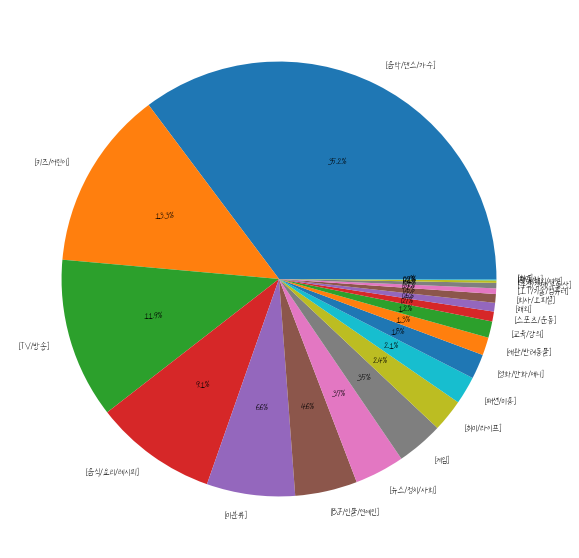

In [138]:
#시각화 !!!!! 
plt.figure(figsize = (30,10)) # 그래프 사이즈 설정 
plt.pie(pivot_df4['subscriber_sum'], labels=pivot_df4['category'], autopct = '%1.1f%%')
plt.show()

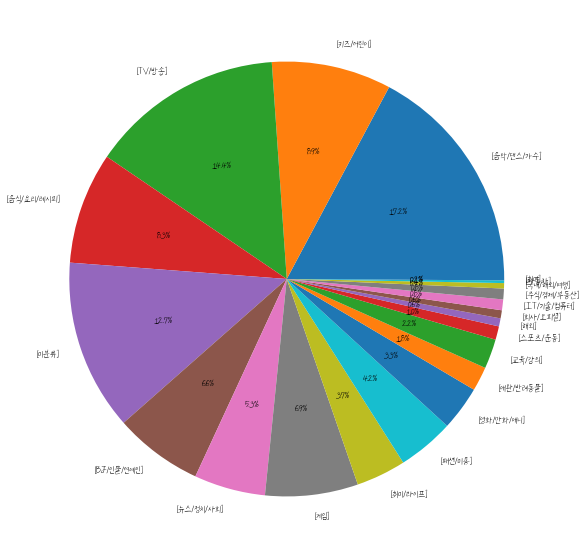

In [139]:
#카테고리별 채널 수 시각화 
plt.figure(figsize = (30,10))
plt.pie(pivot_df4['categoty_count'], labels=pivot_df4['category'], autopct = '%1.1f%%')
plt.show()
